In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

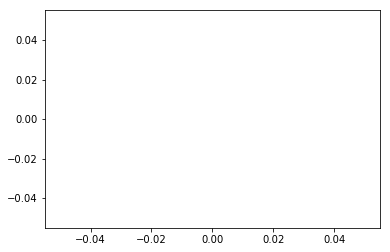

In [2]:
fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2)

nframes = 500

def init():
    line.set_data([], [])
    return (line,)

## Successive overrelaxation

In [3]:
def relax(a=None, b=None, c=None, f=None, tol=1.e-5, maxiter=10000):
    omega = 1.5
    J = len(f)
    q = np.zeros(J)
    qall = np.zeros((J, maxiter))
    rjac = np.cos(np.pi / np.float64(J))
    anormf = np.abs(f[1:-1]).sum()
    for iter in np.arange(maxiter):
        anorm = 0.
        for j in 1 + np.arange(J-2):
            resid = a[j] * q[j + 1] + b[j] * q[j - 1] + c[j] * q[j] - f[j]
            anorm = anorm + np.abs(resid)
            q[j] = q[j] - omega * resid / c[j]
        qall[:, iter] = q
        if(anorm / anormf < tol):
            return(qall[:, 0:iter + 1])
    return(qall[:, 0:iter + 1])

In [4]:
J = 100
a = np.ones(J)
b = np.ones(J)
c = - 2. * np.ones(J)
f = np.zeros(J)
# f[J // 2] = 1.
# f[J // 2 - 5 : J // 2 + 5] = 1.
f[J // 8 - 5 : J // 8 + 5] = 1.
f[7 * J // 8 - 4 : 7 * J // 8 + 6] = 1.
q = relax(a=a, b=b, c=c, f=f)

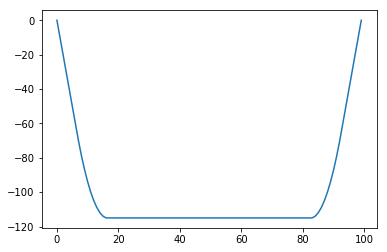

In [5]:
plt.plot(q[:, -1])

In [6]:
def frame(i):
    line.set_data(np.arange(q.shape[0]), q[:, i])
    return (line,)

In [ ]:
ax.set_xlim(( 0., q.shape[0]))
ax.set_ylim(( np.min(q), np.max(q)))

anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=q.shape[1], interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [ ]:
def relax_accelerate(a=None, b=None, c=None, f=None, tol=1.e-5, maxiter=10000):
    J = len(f)
    q = np.zeros(J)
    qall = np.zeros((J, maxiter))
    rjac = np.cos(np.pi / np.float64(J)) * 0.5
    anormf = np.abs(f[1:-1]).sum()
    omega = 1.
    for iter in np.arange(maxiter):
        anorm = 0.
        if(iter % 2 == 0):
            jstart = 2
            jsize = (J - 2) // 2
        else:
            jstart = 1
            jsize = (J - 1) // 2
        for j in jstart + 2 * np.arange(jsize):
            resid = a[j] * q[j + 1] + b[j] * q[j - 1] + c[j] * q[j] - f[j]
            anorm = anorm + np.abs(resid)
            q[j] = q[j] - omega * resid / c[j]
        qall[:, iter] = q
        if(anorm / anormf < tol):
            print(anorm / anormf)
            print(iter)
            return(qall[:, 0:iter + 1])
        if(iter == 0):
            omega = 1. / (1. - 0.5 * rjac**2 * omega)
        else:
            omega = 1. / (1. - 0.25 * rjac**2 * omega)
    print(anorm / anormf)
    print(iter)
    return(qall[:, 0:iter + 1])

In [ ]:
q = relax_accelerate(a=a, b=b, c=c, f=f)
# plt.plot(q[:, - 1])

In [ ]:
ax.set_xlim(( 0., q.shape[0]))
ax.set_ylim(( np.min(q), np.max(q)))

anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=q.shape[1], interval=40,
                               blit=True)

HTML(anim.to_html5_video())